<a href="https://colab.research.google.com/github/Hardikr23/tensorflow_codes/blob/main/DogsvsHumans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2022-03-07 23:16:46--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.133.128, 74.125.140.128, 108.177.15.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.133.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   178MB/s    in 0.4s    

2022-03-07 23:16:46 (178 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
import zipfile

# Unzip the archive
local_zip = './cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()

zip_ref.close()

In [5]:
import os

base_dir = "cats_and_dogs_filtered"

train_path = os.path.join(base_dir,"train")
val_path = os.path.join(base_dir,"validation")

# print(os.listdir(train_path))

In [7]:
# from IPython.core.display import Image
# Getting the images labelled using ImageGenerator from keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_img_gen = ImageDataGenerator(rescale = 1/255,
                             rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             vertical_flip=True,
                             fill_mode="nearest")

val_img_gen = ImageDataGenerator(rescale = 1/255)

train_data = train_img_gen.flow_from_directory(train_path, batch_size=20, class_mode="binary", target_size=(150,150))
val_data = val_img_gen.flow_from_directory(val_path, batch_size=20, class_mode="binary", target_size=(150,150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
from tensorflow.python.ops.gen_nn_ops import MaxPool
# Defining the model to classify our images
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential([
                      keras.layers.Conv2D(64, (3,3), input_shape=(150,150,3), activation="relu"),
                      keras.layers.MaxPooling2D(2,2),
                      keras.layers.Conv2D(32, (3,3), activation="relu"),
                      keras.layers.MaxPooling2D(2,2),
                      keras.layers.Conv2D(32, (3,3), activation="relu"),
                      keras.layers.MaxPooling2D(2,2),
                      keras.layers.Conv2D(16, (3,3), activation="relu"),
                      keras.layers.MaxPooling2D(2,2),
                      keras.layers.Conv2D(16, (3,3), activation="relu"),
                      keras.layers.MaxPooling2D(2,2),

                      keras.layers.Flatten(),
                      keras.layers.Dense(512, activation='relu'),
                      keras.layers.Dense(1, activation='sigmoid')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 32)       0

In [10]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001), loss="binary_crossentropy", metrics=['accuracy'])


In [11]:
history = model.fit(train_data,
          epochs=50,
          steps_per_epoch=100,
          validation_data=val_data,
          validation_steps=50,
          verbose=2
          )

Epoch 1/50
100/100 - 31s - loss: 0.6956 - accuracy: 0.5040 - val_loss: 0.6910 - val_accuracy: 0.5720 - 31s/epoch - 312ms/step
Epoch 2/50
100/100 - 20s - loss: 0.6946 - accuracy: 0.5280 - val_loss: 0.6846 - val_accuracy: 0.6190 - 20s/epoch - 201ms/step
Epoch 3/50
100/100 - 20s - loss: 0.6794 - accuracy: 0.5775 - val_loss: 0.6787 - val_accuracy: 0.5480 - 20s/epoch - 203ms/step
Epoch 4/50
100/100 - 20s - loss: 0.6711 - accuracy: 0.5945 - val_loss: 0.6624 - val_accuracy: 0.5760 - 20s/epoch - 203ms/step
Epoch 5/50
100/100 - 21s - loss: 0.6606 - accuracy: 0.6105 - val_loss: 0.7366 - val_accuracy: 0.5220 - 21s/epoch - 205ms/step
Epoch 6/50
100/100 - 20s - loss: 0.6590 - accuracy: 0.6070 - val_loss: 0.6226 - val_accuracy: 0.6680 - 20s/epoch - 205ms/step
Epoch 7/50
100/100 - 20s - loss: 0.6452 - accuracy: 0.6195 - val_loss: 0.6407 - val_accuracy: 0.6150 - 20s/epoch - 203ms/step
Epoch 8/50
100/100 - 20s - loss: 0.6419 - accuracy: 0.6375 - val_loss: 0.7640 - val_accuracy: 0.5190 - 20s/epoch - 204

In [12]:
model.evaluate(val_data)

50/50 [==============================] - 4s 70ms/step - loss: 0.5419 - accuracy: 0.7150


[0.5419003367424011, 0.7149999737739563]

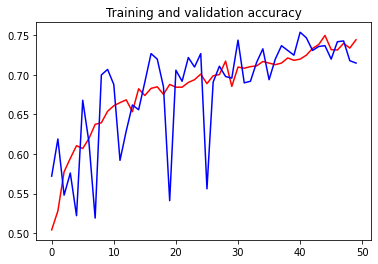

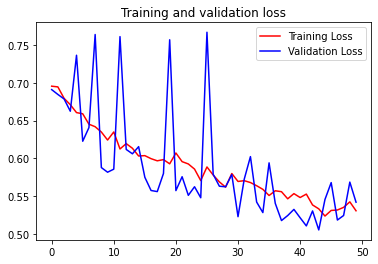

In [14]:
import matplotlib.pyplot as plt

# Plot the model results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()